In [1]:
import numpy as np
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4

In [2]:
def plot_generator_paper(sample, X, Z):
    
    fz = 15*1.25
    lw = 4
    siz = 100
    XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
    XTEXT = 0.25 # Text placement
    YTEXT = 0.3 # Text placement
    
    plt.rc('text', usetex=False)
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    #mpl.rcParams["font.serif"] = "STIX"
    plt.rc('font', family='serif', size=fz)
    matplotlib.rcParams['lines.linewidth'] = lw
    
    
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,1, figsize=(15,6))
    cs0 = ax.pcolor(X, Z, sample, cmap=cmap, vmin=-1.0, vmax = 1.0)
    ax.set_title("Anomalous Vertical Velocity Field Detected By ELBO")
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel("CRMs", fontsize=fz*1.5)
    ax.xaxis.set_label_coords(0.54,-0.05)
    h = ax.set_ylabel("hPa", fontsize = fz*1.5)
    h.set_rotation(0)
    ax.yaxis.set_label_coords(-0.10,0.44)
    #y_ticks = np.arange(1350, 0, -350)
    #ax.set_yticklabels(y_ticks, fontsize=fz*1.33)
    ax.tick_params(axis='x', labelsize=fz*1.33)
    ax.tick_params(axis='y', labelsize=fz*1.33)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(cs0, cax=cax)
    cbar.set_label(label=r'$\left(\mathrm{m\ s^{-1}}\right)$', rotation="horizontal", fontsize=fz*1.5, labelpad=30, y = 0.65)
    plt.show()
    #plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Anomaly.pdf")
    
#plot_generator(test[0,:,:])

In [3]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw



In [4]:
z_test_tsne_track = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/2D_PCA_Latent_Space__171.npy")

Test_Images = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Space_Time_W_Test.npy")

Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Space_Time_Min_Scalar.npy")

Test_Images = np.interp(Test_Images, (0, 1), (Min_Scalar, Max_Scalar))

In [5]:
print(Test_Images.shape)

(50688, 30, 128)


## $W_{ 500}$ Absolute

In [6]:
W_500_Label_All = np.nanmean(np.abs(np.squeeze(Test_Images[:,-12,:])), axis=1)

0.025895523236433248
-0.0010040913095561619


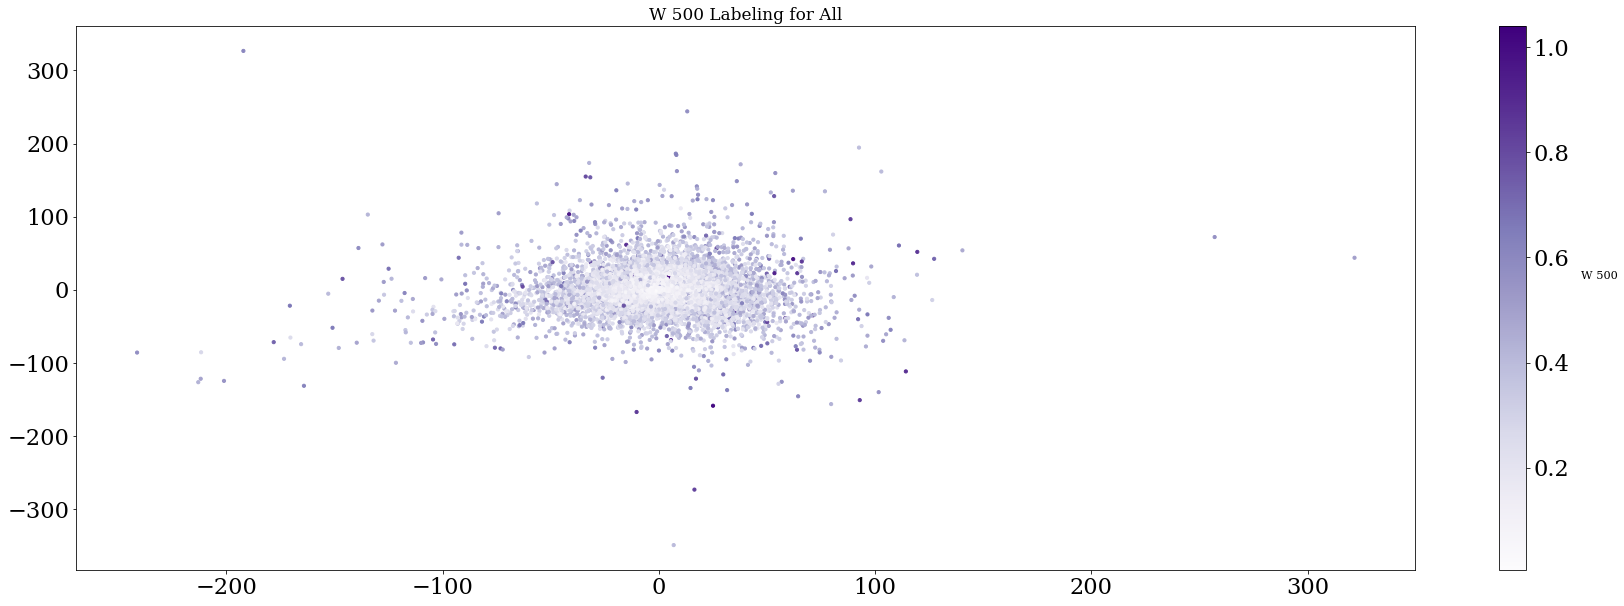

In [7]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_500_Label_All, cmap="Purples", s=10.0)
ax.set_title("W 500 Labeling for All", fontsize = fz*0.75)
#ax.set_xlim(-40,100)
#ax.set_ylim(-20,35)
cbar = fig.colorbar(cp)
cbar.set_label(label="W 500", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_500_Label_All)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_500_Label_All)[0])

## $W_{890}$ ; Top of PBL Absolute

In [8]:
W_PBL_Label_All = np.nanmean(np.abs(np.squeeze(Test_Images[:,-6,:])), axis=1)

0.03085126578978502
-0.0007945125179658415


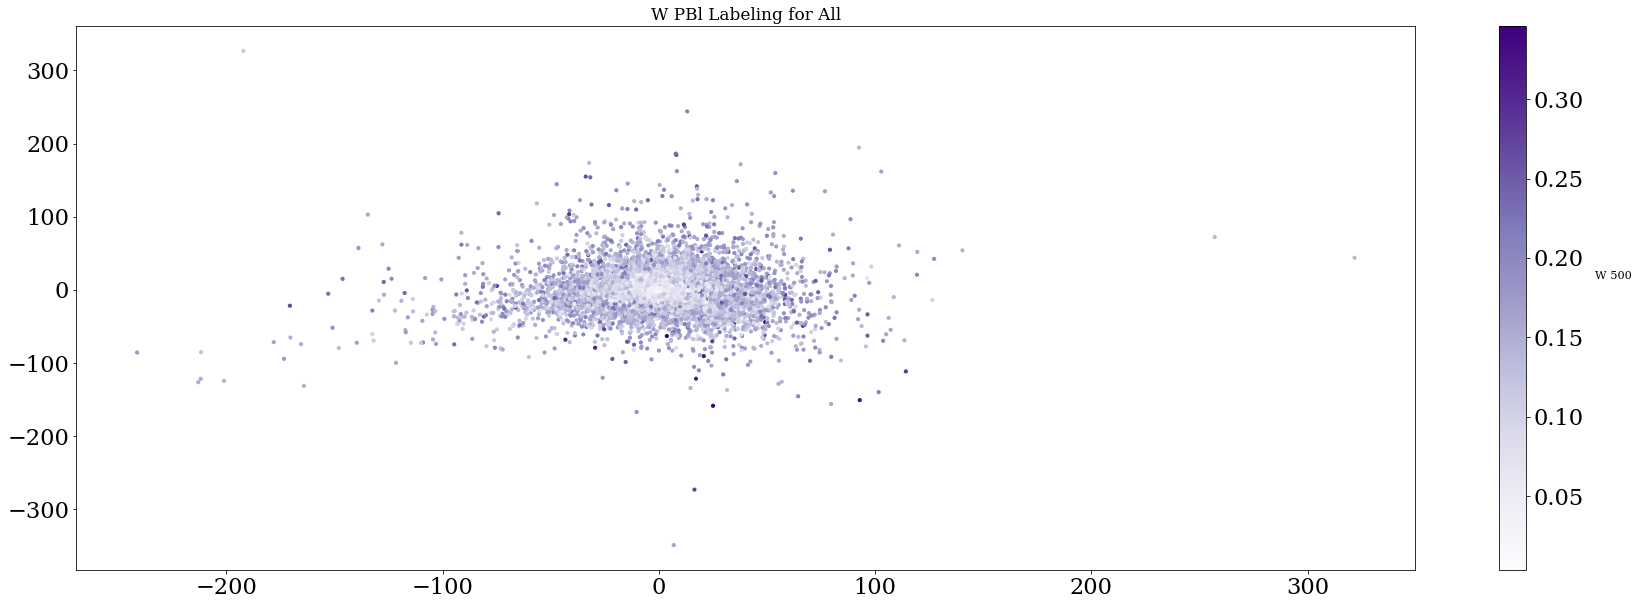

In [9]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_PBL_Label_All, cmap="Purples", s=10.0)
ax.set_title("W PBl Labeling for All", fontsize = fz*0.75)
#ax.set_xlim(-40,100)
#ax.set_ylim(-20,35)
cbar = fig.colorbar(cp)
cbar.set_label(label="W 500", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_PBL_Label_All)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_PBL_Label_All)[0])

## $ W^{'} W^{'}$ ; Entire Test Dataset

In [10]:
W_Prime_All = np.empty(shape=(len(Test_Images)))

In [11]:
All_Mean = np.nanmean(Test_Images, axis=0)
for i in range(len(Test_Images)):
    W_Prime_All[i] = np.nanmean(np.square(np.squeeze(Test_Images[i,:,:])-All_Mean))

0.03409455516049289
0.014508231044088233


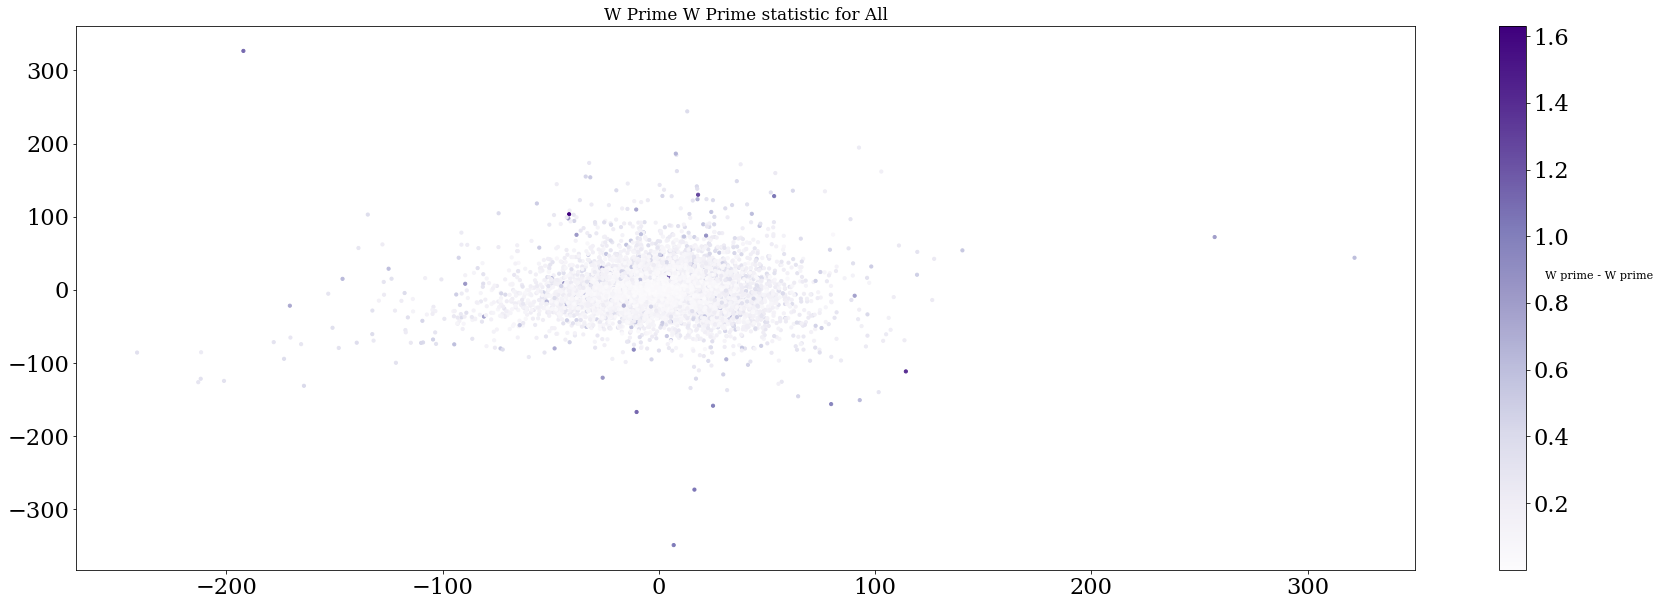

In [12]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_Prime_All, cmap="Purples", s=10.0)
ax.set_title("W Prime W Prime statistic for All", fontsize = fz*0.75)
#ax.set_xlim(-40,100)
#ax.set_ylim(-20,35)
cbar = fig.colorbar(cp)
cbar.set_label(label="W prime - W prime", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_Prime_All)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_Prime_All)[0])

## $ W^{'} W^{'}$ ; Smaller Subset

In [13]:
W_Prime_All_Subset = np.empty(shape=(len(Test_Images)))

In [14]:
tree = KDTree(z_test_tsne_track)
for i in range(len(Test_Images)):
    dist, ind = tree.query(z_test_tsne_track[i,:].reshape(1,-1), k=50) 
    temp_mean = np.nanmean(Test_Images[ind,:,:], axis=0)
    W_Prime_All_Subset[i] = np.nanmean(np.square(np.squeeze(Test_Images[i,:,:])-temp_mean))

0.048401283544426736
0.02725490020014586


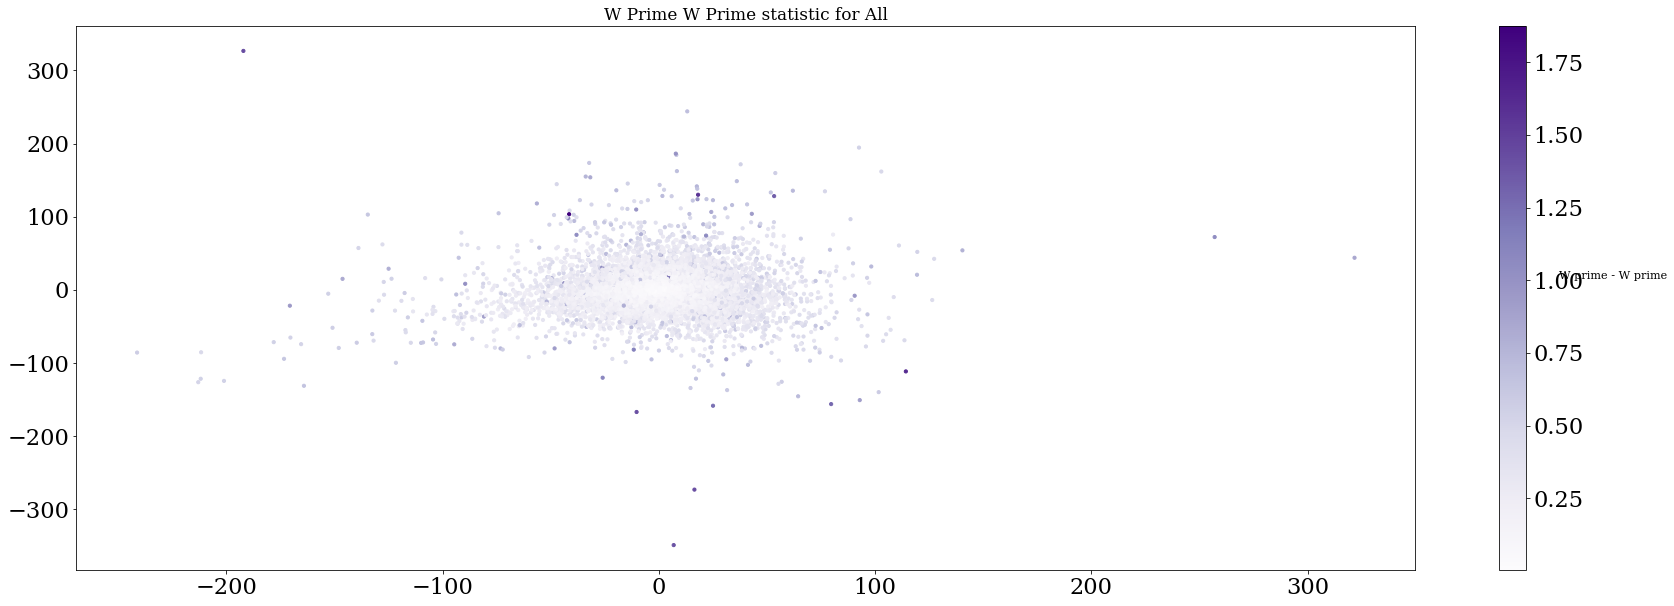

In [15]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=W_Prime_All_Subset, cmap="Purples", s=10.0)
ax.set_title("W Prime W Prime statistic for All", fontsize = fz*0.75)
#ax.set_xlim(-40,100)
#ax.set_ylim(-20,35)
cbar = fig.colorbar(cp)
cbar.set_label(label="W prime - W prime", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], W_Prime_All_Subset)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], W_Prime_All_Subset)[0])

# External Metrics

In [16]:
path = '/DFS-L/DATA/pritchard/gmooers/Workflow/MAPS/SPCAM/100_Days/New_SPCAM5/archive/TimestepOutput_Neuralnet_SPCAM_216/atm/hist/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-19-4*'
real_ds = xr.open_mfdataset(path)
#precip rate
P_CRM = real_ds.CRM_PREC_LON_0e_to_360e_LAT_20s_to_20n
#column water vapor, column saturation fraction
Q_CRM = real_ds.CRM_QV_LON_0e_to_360e_LAT_20s_to_20n
#DSE, lower tropospheric stability
T_CRM = real_ds.CRM_T_LON_0e_to_360e_LAT_20s_to_20n
#latitude 
latitudes = real_ds.LAT_20s_to_20n

#gms
U_GCM = real_ds.U10_LON_0e_to_360e_LAT_20s_to_20n
V_GCM = real_ds.VAP_LON_0e_to_360e_LAT_20s_to_20n
T_GCM = real_ds.T_LON_0e_to_360e_LAT_20s_to_20n
Q_GCM = real_ds.QAP_LON_0e_to_360e_LAT_20s_to_20n

latitudes = xr.DataArray.squeeze(latitudes).values
P_CRM = xr.DataArray.squeeze(P_CRM).values
Q_CRM = xr.DataArray.squeeze(Q_CRM).values
T_CRM = xr.DataArray.squeeze(T_CRM).values

U_GCM = xr.DataArray.squeeze(U_GCM).values
V_GCM = xr.DataArray.squeeze(V_GCM).values
T_GCM = xr.DataArray.squeeze(T_GCM).values
Q_GCM = xr.DataArray.squeeze(Q_GCM).values

path = '/DFS-L/DATA/pritchard/gmooers/Workflow/MAPS/SPCAM/100_Days/New_SPCAM5/archive/TimestepOutput_Neuralnet_SPCAM_216/atm/hist/TimestepOutput_Neuralnet_SPCAM_216.cam.h0.2008-11.nc'
next_ds = xr.open_dataset(path)

#land fraction
land_frac = next_ds.LANDFRAC
land_frac = xr.DataArray.squeeze(land_frac).values

In [17]:
path_to_file = '/DFS-L/DATA/pritchard/gmooers/Workflow/MAPS/SPCAM/100_Days/New_SPCAM5/archive/TimestepOutput_Neuralnet_SPCAM_216/atm/hist/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.20*'
extra_variables = xr.open_mfdataset(path_to_file)

## Land Fraction

In [18]:
trop_land = land_frac[37:59, :]
geo_labels = np.zeros(shape=(int(len(z_test_tsne_track)/(22*144)), 22, 144))
geo_labels[:,:,:] = np.nan

for i in range(len(geo_labels)):
    geo_labels[i,:,:] = trop_land[:,:]
    
geo_label_final = np.reshape(geo_labels, (geo_labels.size))

-0.003066241447296998
0.003472874020781099


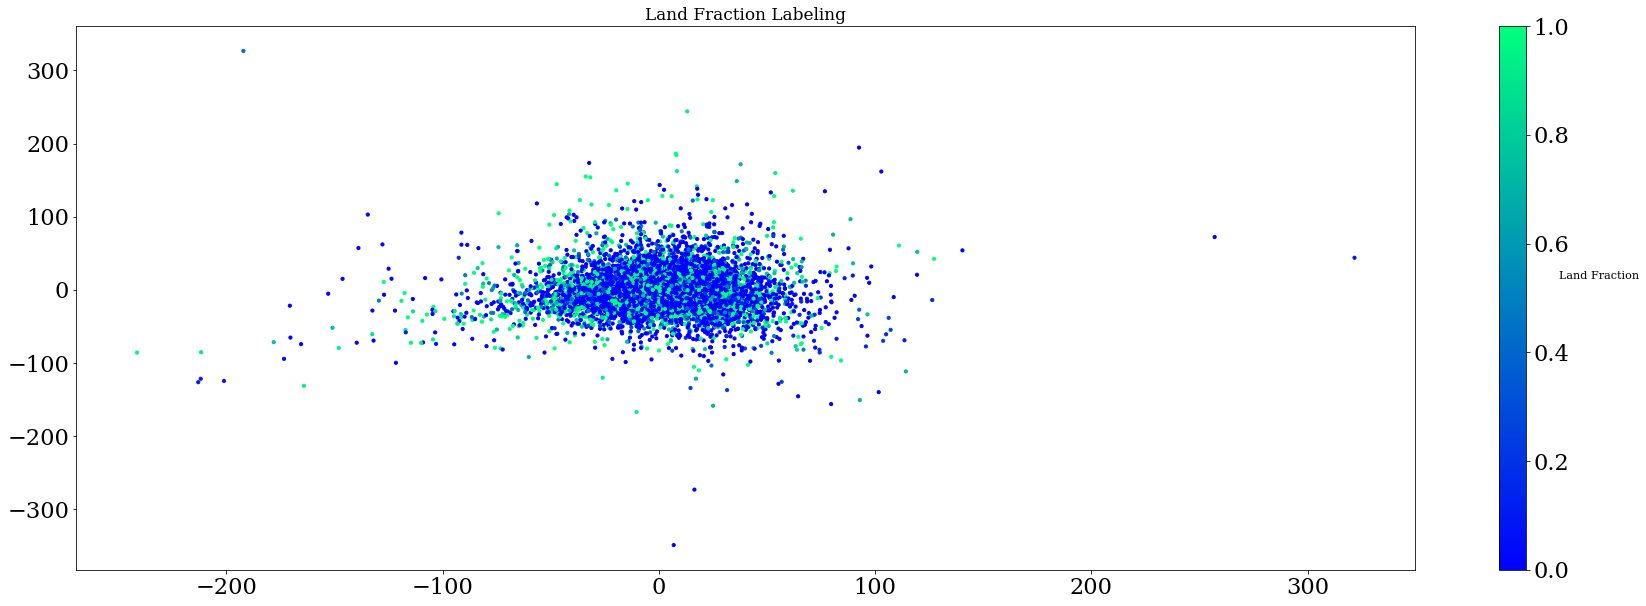

In [19]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=geo_label_final, cmap="winter", s=10.0)
ax.set_title("Land Fraction Labeling", fontsize = fz*0.75)
#ax.set_xlim(-40,100)
#ax.set_ylim(-20,35)
cbar = fig.colorbar(cp)
cbar.set_label(label="Land Fraction", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], geo_label_final)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], geo_label_final)[0])

## Latitude

In [20]:
lat_labels = np.zeros(shape=(int(len(z_test_tsne_track)/(22*144)), 22, 144))
lat_labels[:,:,:] = np.nan

temp_lats = np.abs(latitudes)
scaled_lats = np.interp(temp_lats, (np.min(temp_lats), np.max(temp_lats)), (0, +1))

for i in range(len(lat_labels)):
    for j in range(len(lat_labels[0][0])):
        lat_labels[i,:,j] = scaled_lats
        
lat_label_final = np.reshape(lat_labels, (lat_labels.size))

-0.01894722712009953
0.000751010547932808


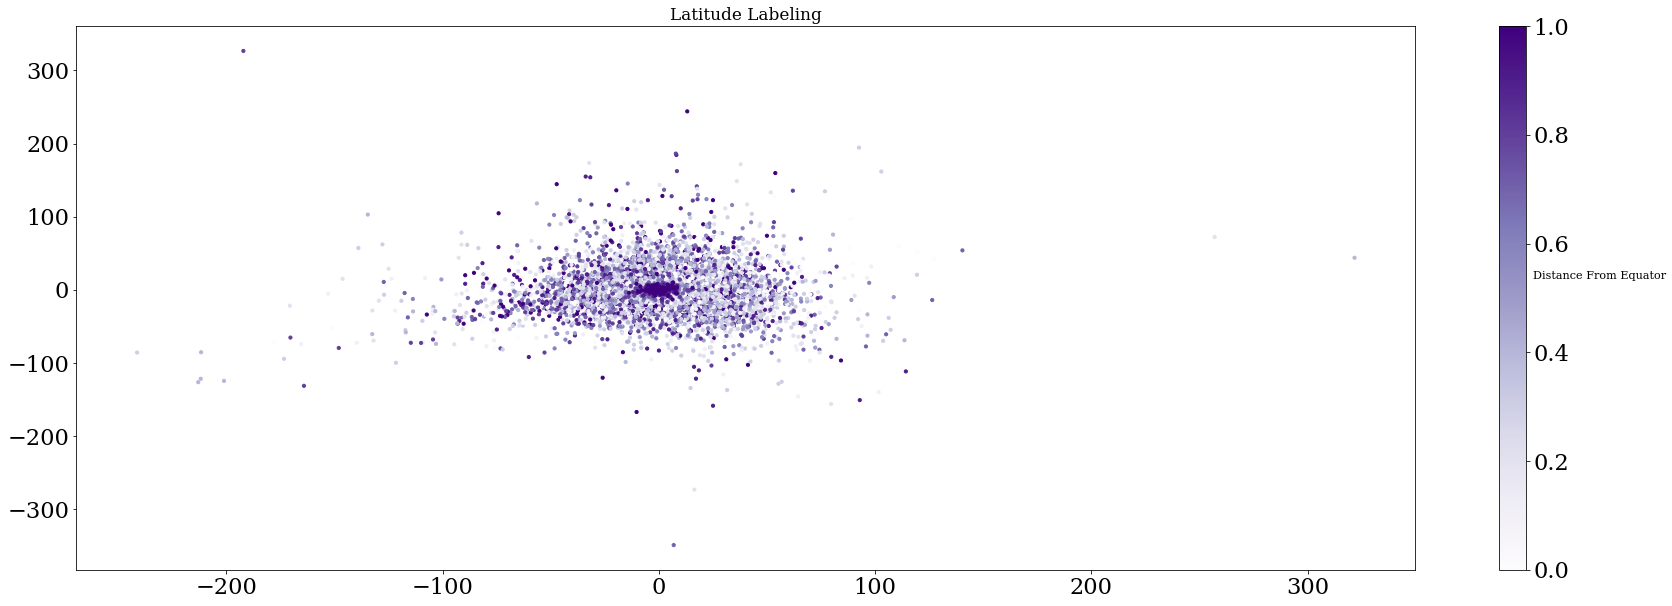

In [21]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=lat_label_final, cmap="Purples", s=10.0)
ax.set_title("Latitude Labeling", fontsize = fz*0.75)
#ax.set_xlim(-40,100)
#ax.set_ylim(-20,35)
cbar = fig.colorbar(cp)
cbar.set_label(label="Distance From Equator", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], lat_label_final)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], lat_label_final)[0])

## Precipitation Rate

In [22]:
P_CRM_Fixed = P_CRM*60*60*24
P_CRM_Label = np.nansum(P_CRM_Fixed, axis = 1)
P_CRM_Label_final = np.reshape(P_CRM_Label, (P_CRM_Label.size))

0.03371608030886599
0.007460718107143386


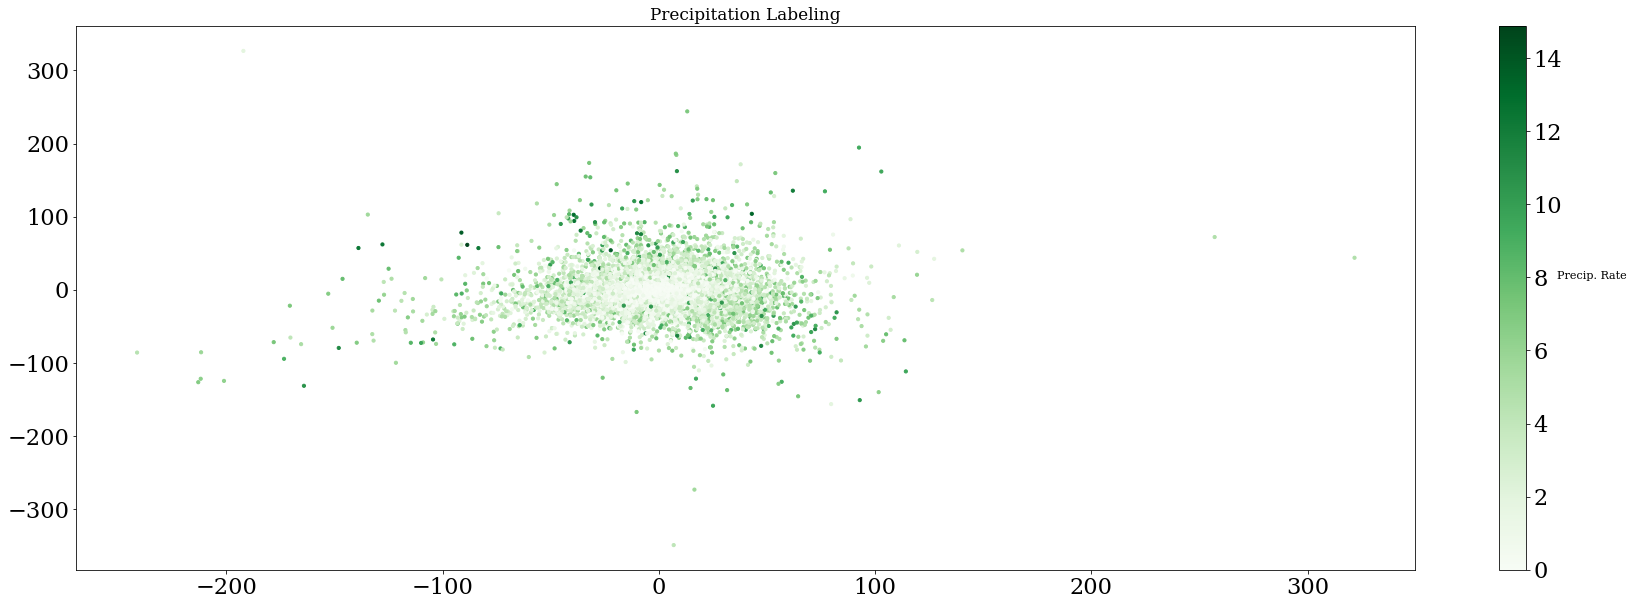

In [23]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=P_CRM_Label_final, cmap="Greens", s=10.0)
ax.set_title("Precipitation Labeling", fontsize = fz*0.75)
#ax.set_xlim(-40,100)
#ax.set_ylim(-20,35)
cbar = fig.colorbar(cp)
cbar.set_label(label="Precip. Rate", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], P_CRM_Label_final)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], P_CRM_Label_final)[0])

In [24]:
others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-72000.nc")
plev = np.array(others.variables['lev'])
ps = np.array(others.variables['PS'])
g = 9.81 #m/s^2
hyai = np.array(others.variables['hyai'])
hybi = np.array(others.variables['hybi'])
#print(hyai.shape)
#print(hyai)
cp = 1004.0
L = 2256000.0
PS = 1e5
P0 = 1e5
P = P0*hyai+PS*hybi # Total pressure [Pa]
dp = P[1:]-P[:-1] # Differential pressure [Pa]
Scalar_Q_CRM = np.nansum(np.nansum(Q_CRM*dp[None, :, None, None, None]*L/g, axis=1),axis=1)
Scalar_T_CRM = np.nansum(np.nansum(T_CRM*dp[None, :, None, None, None]*cp/g, axis=1), axis=1)
Q_CRM_Label_final = np.reshape(Scalar_Q_CRM, (Scalar_Q_CRM.size))
T_CRM_Label_final = np.reshape(Scalar_T_CRM, (Scalar_T_CRM.size))

## Column Dry Static Energy

-0.014228581559695452
0.005493576255338849


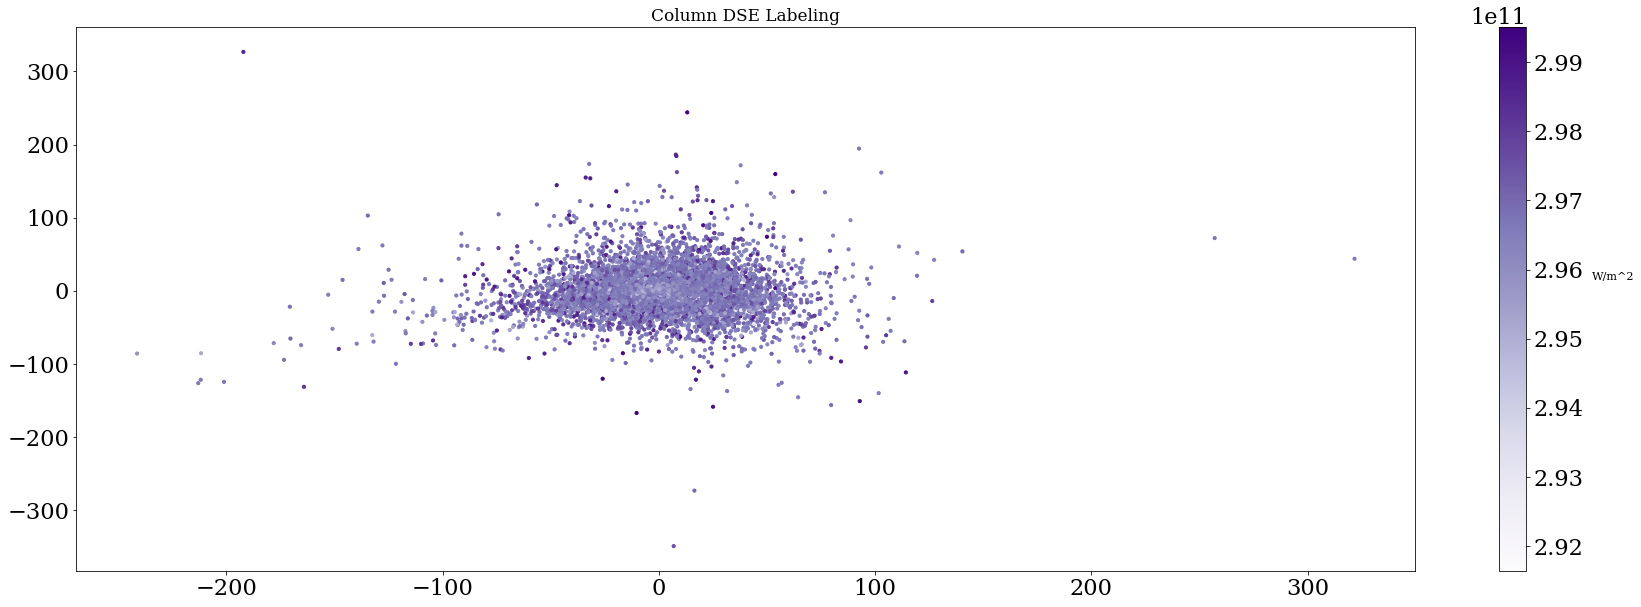

In [25]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=T_CRM_Label_final, cmap="Purples", s=10.0)
ax.set_title("Column DSE Labeling", fontsize = fz*0.75)
#ax.set_xlim(-40,100)
#ax.set_ylim(-20,35)
cbar = fig.colorbar(cp)
cbar.set_label(label="W/m^2", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], T_CRM_Label_final)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], T_CRM_Label_final)[0])

## Column Water Vapor

0.009952569014335798
-0.003609169462077218


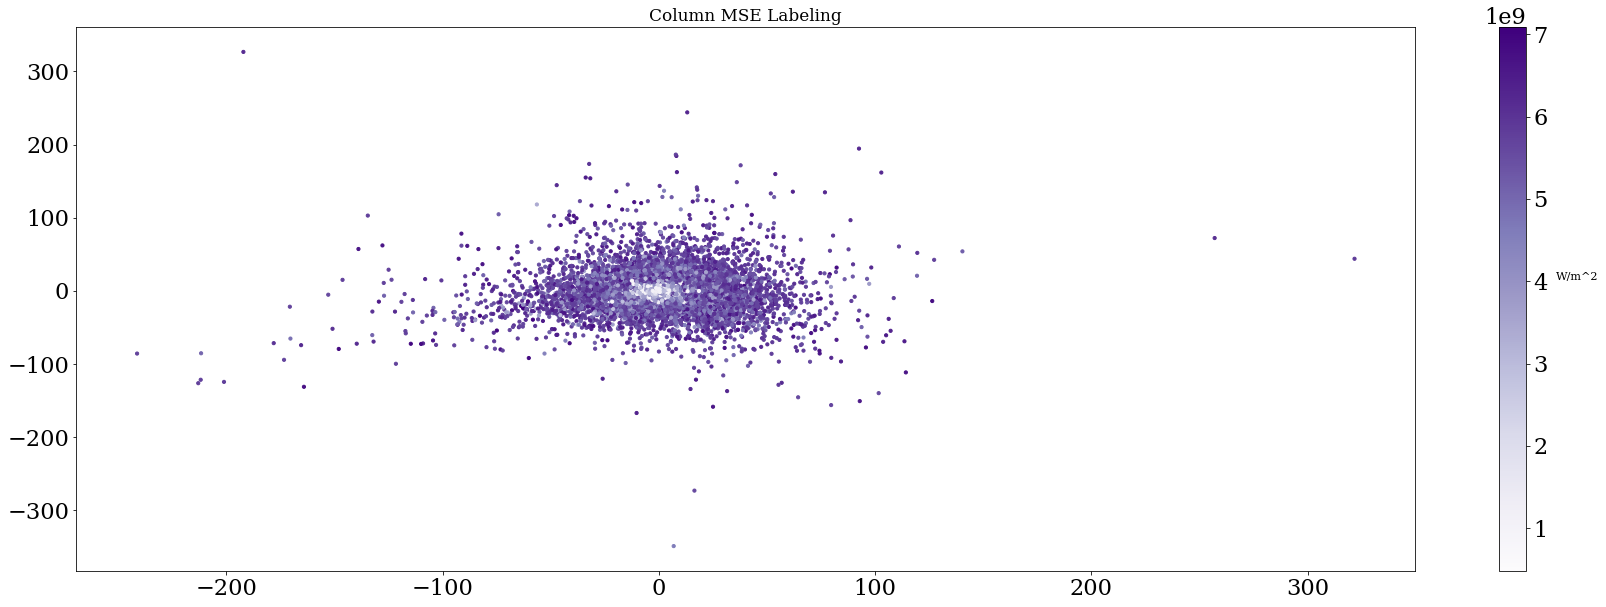

In [26]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=Q_CRM_Label_final, cmap="Purples", s=10.0)
ax.set_title("Column MSE Labeling", fontsize = fz*0.75)
#ax.set_xlim(-40,100)
#ax.set_ylim(-20,35)
cbar = fig.colorbar(cp)
cbar.set_label(label="W/m^2", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], Q_CRM_Label_final)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], Q_CRM_Label_final)[0])

## Lower Tropospheric Stability

In [27]:
print(T_CRM.shape)
T_Top = np.squeeze(T_CRM[:,-10,:,:,:])
T_Top_Theta = T_Top*(691.0/1013.25)**(287.0/1004.0)

T_Bottom = np.squeeze(T_CRM[:,-1,:,:,:])
LTS = T_Top_Theta - T_Bottom
LTS = np.nansum(LTS, axis=1)
LTS_Label_final = np.reshape(LTS, (LTS.size))

(16, 30, 128, 22, 144)


0.0043658267877502085
-0.0011651712324446662


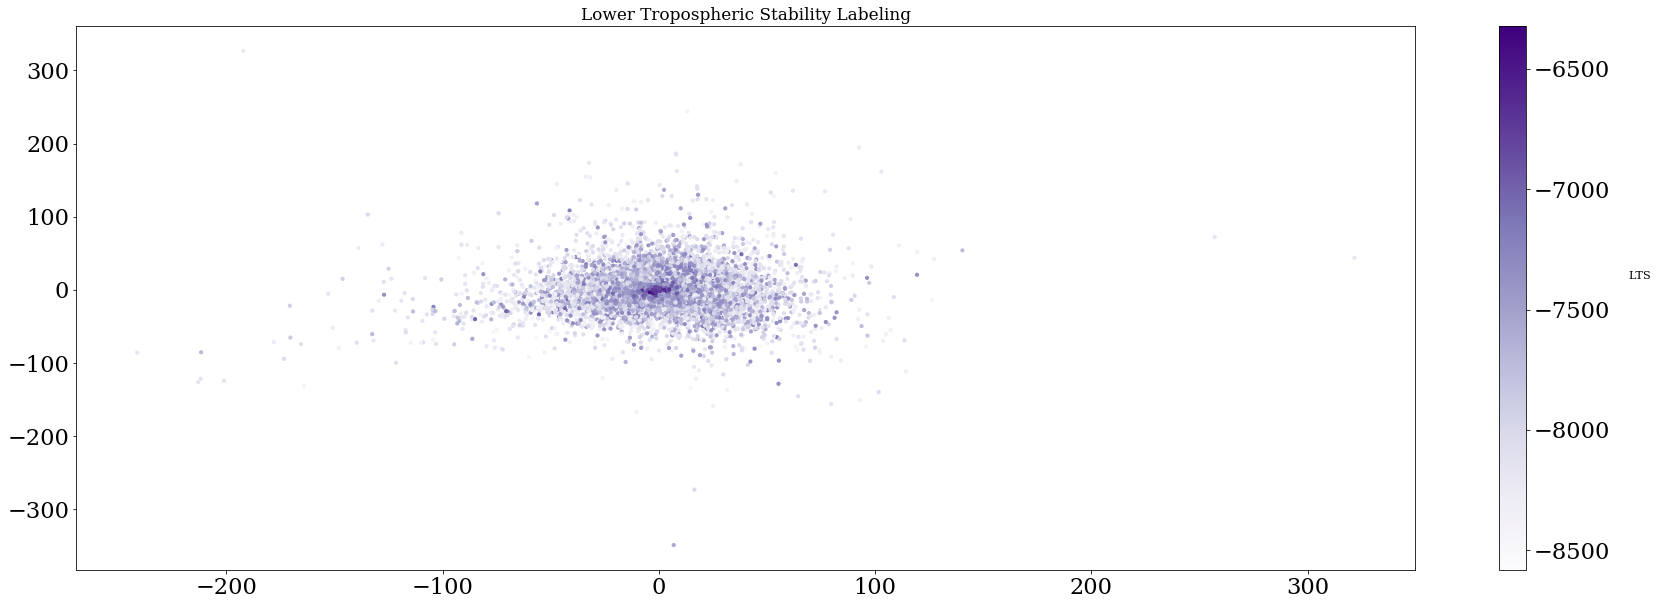

In [28]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=LTS_Label_final, cmap="Purples", s=10.0)
ax.set_title("Lower Tropospheric Stability Labeling", fontsize = fz*0.75)
#ax.set_xlim(-40,100)
#ax.set_ylim(-20,35)
cbar = fig.colorbar(cp)
cbar.set_label(label="LTS", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], LTS_Label_final)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], LTS_Label_final)[0])

## Column Saturation Fraction

In [29]:
def eliq(T):
    a_liq = np.array([-0.976195544e-15,-0.952447341e-13,0.640689451e-10,0.206739458e-7,0.302950461e-5,0.264847430e-3,0.142986287e-1,0.443987641,6.11239921]);
    c_liq = -80
    T0 = 273.16
    return 100*np.polyval(a_liq,np.maximum(c_liq,T-T0))

def eice(T):
    a_ice = np.array([0.252751365e-14,0.146898966e-11,0.385852041e-9,0.602588177e-7,0.615021634e-5,0.420895665e-3,0.188439774e-1,0.503160820,6.11147274]);
    c_ice = np.array([273.15,185,-100,0.00763685,0.000151069,7.48215e-07])
    T0 = 273.16
    return (T>c_ice[0])*eliq(T)+\
(T<=c_ice[0])*(T>c_ice[1])*100*np.polyval(a_ice,T-T0)+\
(T<=c_ice[1])*100*(c_ice[3]+np.maximum(c_ice[2],T-T0)*(c_ice[4]+np.maximum(c_ice[2],T-T0)*c_ice[5]))

def esat(T):
    T0 = 273.16
    T00 = 253.16
    omega = np.maximum(0,np.minimum(1,(T-T00)/(T0-T00)))
    
    return (T>T0)*eliq(T)+(T<T00)*eice(T)+(T<=T0)*(T>=T00)*(omega*eliq(T)+(1-omega)*eice(T))



def qv(T,RH,P0,PS,hyam,hybm):
    R = 287
    Rv = 461
    #p = np.moveaxis((hyam*P0+hybm*PS),0,1) # Total pressure (Pa)
    p = hyam*P0+hybm*PS
    return R*esat(T)*RH/(Rv*p[None,:-1,None,None])

GCM_Q = real_ds.Q_LON_0e_to_360e_LAT_20s_to_20n.values
GCM_T = real_ds.T_LON_0e_to_360e_LAT_20s_to_20n.values
CSF_Top = np.nansum(GCM_Q*dp[None,:,None,None]/g, axis=1)

Q_sat = qv(GCM_T,1.0,P0,PS,hyai,hybi)
CSF_bottom = np.nansum(Q_sat*dp[None,:,None,None]/g, axis=1)
CSF = (CSF_Top/CSF_bottom)
CSF_Label_final = np.reshape(CSF, (CSF.size))

-0.009427620938240892
0.0038945668920027598


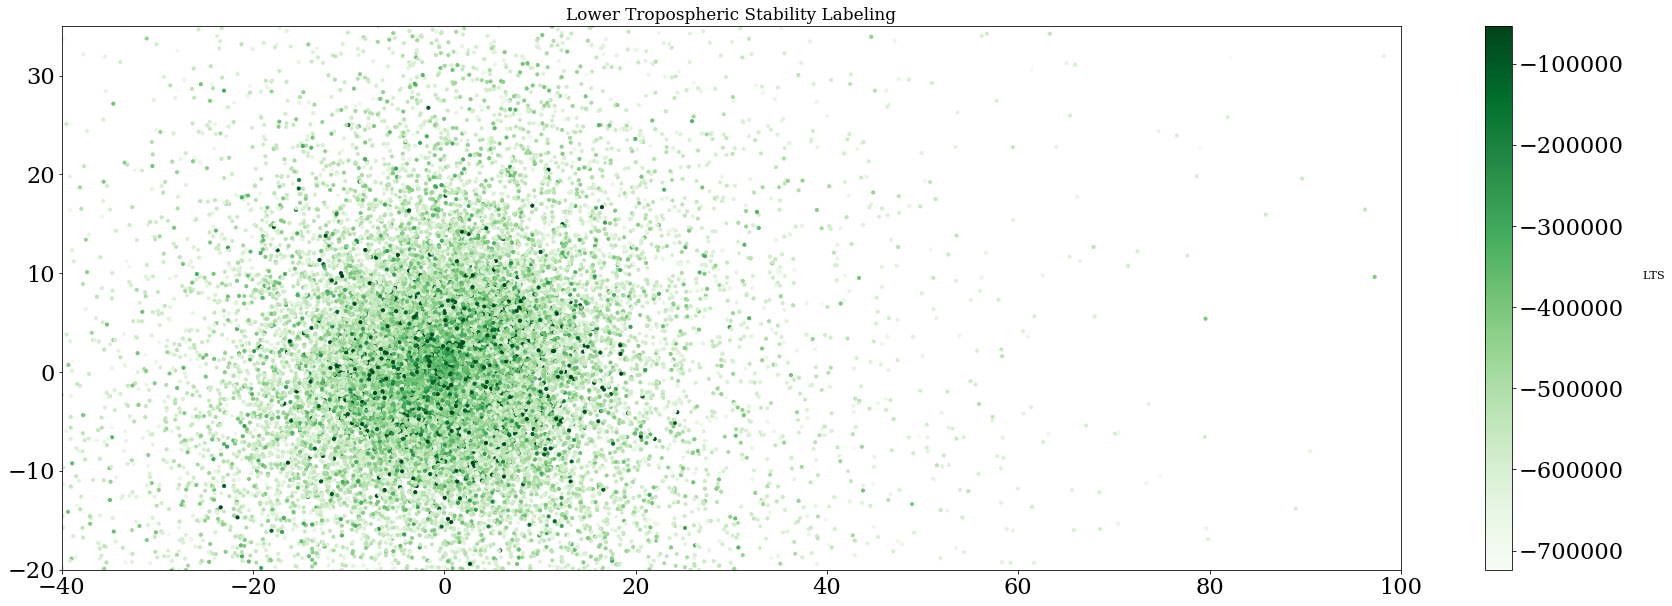

In [30]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=CSF_Label_final, cmap="Greens", s=10.0)
ax.set_title("Lower Tropospheric Stability Labeling", fontsize = fz*0.75)
ax.set_xlim(-40,100)
ax.set_ylim(-20,35)
cbar = fig.colorbar(cp)
cbar.set_label(label="LTS", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

print(scipy.stats.pearsonr(z_test_tsne_track[:, 0], CSF_Label_final)[0])
print(scipy.stats.pearsonr(z_test_tsne_track[:, 1], CSF_Label_final)[0])

## Gross Moist Stability